#### 타이타닉 데이터를 활용한 승선자의 생사여부 예측
##### EDA를 활용한 Feature, Target 구성 여부 확인

In [40]:
import pandas as pd

In [114]:
train_df = pd.read_csv("../Data/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
train_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [43]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


>3 등급은 선실이 없다.
age 가 없는게 있다.

In [44]:
# Age의 컬럼 선택 여부 확인 : 결측치가 20%이상이면 해당 컬럼은 사용할 수 없다.
(len(train_df) - train_df.Age.count()) / len(train_df) * 100

np.float64(19.865319865319865)

In [45]:
print(len(train_df.Age))
print(train_df.Age.count())   # 결측치는 빼고 카운트를 해야함?

891
714


In [46]:
# age가  null 인것 null이 아닌것을 분류해서 데이터 분석을 할 수 있다.
age_null = train_df[train_df.Age.isnull()]
age_not_null =train_df[train_df.Age.notnull()]
len(age_null) + len(age_not_null)

891

In [47]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> PassengerId순으로 되어있음. 의미없어서 정렬을 다시 해줌.

In [48]:
# Survived와 Pclass 기준으로 Dataset 정렬 : 정렬 후 index 재정리 필요
train_df = train_df.sort_values(by = ['Survived', 'Pclass']).reset_index(drop=True)
train_df.iloc[500:520,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
500,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S
501,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S
502,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.1250,NaN,Q
503,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q
504,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
505,795,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S
506,799,0,3,"Ibrahim Shawah, Mr. Yousseff",male,30.0,0,0,2685,7.2292,NaN,C
507,800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S
508,806,0,3,"Johansson, Mr. Karl Johan",male,31.0,0,0,347063,7.7750,NaN,S
509,808,0,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.7750,NaN,S


In [49]:
train_df.shape

(891, 12)

In [50]:
# Survived 기준으로 생존과 사망의 Count 확인
print(f"사망자 수 : {train_df[train_df.Survived == 0].shape[0]}")  # 사망자 수
print(f"생존자 수 : {train_df[train_df.Survived == 1].shape[0]}")  # 생존자 수
# 60% 넘어서 타겟으로 사용 가능

사망자 수 : 549
생존자 수 : 342


In [51]:
# 생존과 사망의 DataFreame 만들기
result = [train_df[train_df.Survived == 0].shape[0], train_df[train_df.Survived == 1].shape[0]]
live_death = pd.DataFrame(
    {
        'Result' : result
    },
    index= ['사망', '생존']
)
live_death

,Result
사망,549
생존,342


In [52]:
# Pie Chart
import matplotlib.pyplot as plt
import koreanize_matplotlib     

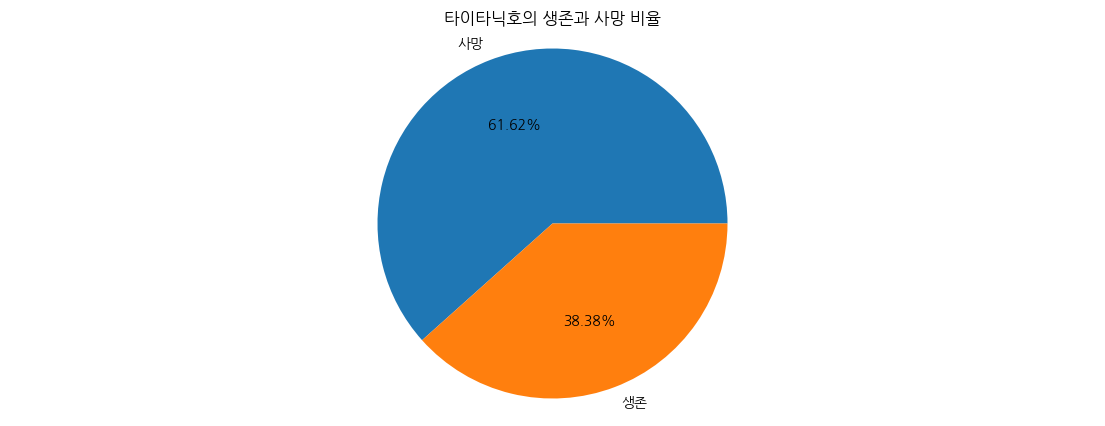

In [53]:
plt.figure(figsize = (14,5))

live_death.Result.plot(
    kind = 'pie',
    autopct = '%.2f%%'
)
plt.title('타이타닉호의 생존과 사망 비율')
plt.axis('equal')
plt.ylabel('')

plt.show()

> Target의 비율이 60%보다 크므로 Target으로 약간 아쉽지만 적합하다.

----
Feature 컬럼 선택

In [54]:
train_df.head()
# 쉬운 데이터 = 결측치 없고 분류하기쉬워야함. =>  성별, pclass
# target의 비율은 1:1, Feature의 비율은 차이가 나야함. 1:1은 x 구분할 수 없음.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


#### Sex컬럼이 Feature로 적합한지 확인
: null도 없고 category갯수도 적다.

In [55]:
train_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [56]:
314/577

0.5441941074523396

> 남성의 승선수가 여성의 승선수 보다 거의 2배이다.
Feature는 차이가 특성이 필요한데, 일단 승선수만 보면 Feature로 사용할 수 있을 것 같다.

#### Target 컬럼과 연결하여 Feature가 될 수 있는지 확인

In [57]:
# 여성의 생존과 사망수 
female_survived = train_df[(train_df.Sex == 'female') & (train_df.Survived == 1)].shape[0]
female_death = train_df[(train_df.Sex == 'female') & (train_df.Survived == 0)].shape[0]

print(f"여성의 생존수는 {female_survived}이고 사망수는 {female_death}이다")

여성의 생존수는 233이고 사망수는 81이다


In [58]:
# 남성의 생존과 사망수 
male_survived = train_df[(train_df.Sex == 'male') & (train_df.Survived == 1)].shape[0]
male_death = train_df[(train_df.Sex == 'male') & (train_df.Survived == 0)].shape[0]

print(f"남성의 생존수는 {male_survived}이고 사망수는 {male_death}이다")

남성의 생존수는 109이고 사망수는 468이다


> 여성과 남성의 생존여부를 연결하여 특징을 보았는데 성별로 정반대의 특징이 나타난다.
Sex컬럼은 Feature로서 충분하다.

In [59]:
# 둘 사이의 파이차트 그리기





----
### Pclass의 Feature 확인

In [60]:
# Pclass의 Category 분포 확인
train_df.Pclass.value_counts().sort_index()

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

> 객실의 등급별 인원수로 보아 1, 2등급은 크게 차이나지 않지만, 1과 3 그리고 2와 3을 차이가 있어 Feature의 가능성이 보임

#### [Survived] <-> [Sex, Pclass확인]

In [61]:
# 1등급 객실의 여성 생존율
female_count = train_df[(train_df.Sex == 'female') & (train_df.Pclass == 1)].shape[0]
female_live = train_df[(train_df.Sex == 'female') & (train_df.Pclass == 1) & (train_df.Survived == 1)].shape[0]

print(f"1등급 객실의 여성의 생존율을 {female_live} / {female_count}로 {round(female_live/female_count*100)}% 이다")

1등급 객실의 여성의 생존율을 91 / 94로 97% 이다


In [62]:
# 1, 2, 3등 객실의 여성 생존률

for i in train_df.Pclass.unique():
    female_count = train_df[(train_df.Sex == 'female') & (train_df.Pclass == i)].shape[0]
    female_live = train_df[(train_df.Sex == 'female') & (train_df.Pclass == i) & (train_df.Survived == 1)].shape[0]
    print(f"{i}등급 객실의 여성의 생존율을 {female_live} / {female_count}로 {round(female_live/female_count*100)}% 이다")


1등급 객실의 여성의 생존율을 91 / 94로 97% 이다
2등급 객실의 여성의 생존율을 70 / 76로 92% 이다
3등급 객실의 여성의 생존율을 72 / 144로 50% 이다


In [63]:
# 1, 2, 3등급 객실의 여성 남성 생존률
for gender in train_df.Sex.unique():
    for i in train_df.Pclass.unique():
        male_count = train_df[(train_df.Sex == gender) & (train_df.Pclass == i)].shape[0]
        male_live = train_df[(train_df.Sex == gender) & (train_df.Pclass == i) & (train_df.Survived == 1)].shape[0]
        print(f"{i}등급 객실의 {"남성" if gender == 'male' else '여성'}의 생존율을 {male_live} / {male_count:>3}로 {male_live/male_count*100:.2f} 이다")
    print('-' * 50)


1등급 객실의 남성의 생존율을 45 / 122로 36.89 이다
2등급 객실의 남성의 생존율을 17 / 108로 15.74 이다
3등급 객실의 남성의 생존율을 47 / 347로 13.54 이다
--------------------------------------------------
1등급 객실의 여성의 생존율을 91 /  94로 96.81 이다
2등급 객실의 여성의 생존율을 70 /  76로 92.11 이다
3등급 객실의 여성의 생존율을 72 / 144로 50.00 이다
--------------------------------------------------



#### [Survived] <-> [Sex, Pclass]로 결정

In [64]:
train_df.Embarked.unique()
# nan 값 찾아야함

<StringArray>
['S', 'C', 'Q', nan]
Length: 4, dtype: str

In [65]:
# NaN인 데이터 찾기
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
556,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
672,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [66]:
# 항구별 승선 인원
train_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

> s항구가 수치가 높기 때문에 S항수로 nan값을 변환

In [67]:
train_df.loc[train_df.Embarked.isnull(), 'Embarked'] = "S"
train_df.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [68]:
# 항구별 성별 승선 인원
train_df.groupby(
    ['Embarked', 'Sex']
).size()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    205
          male      441
dtype: int64

In [69]:
# 항구별 생존 인원
train_df.groupby(
    ['Embarked', 'Survived']
).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
dtype: int64

In [70]:
# 항구별 객실등급 인원
train_df.groupby(
    ['Embarked', 'Pclass']
).size()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         129
          2         164
          3         353
dtype: int64

----
### [Survived] <- [Sex, Pclass, Embarked]

In [71]:
train = train_df[['Survived', 'Sex', 'Pclass', 'Embarked']]
train.head()

,Survived,Sex,Pclass,Embarked
0,0,male,1,S
1,0,male,1,S
2,0,male,1,C
3,0,male,1,C
4,0,male,1,S


In [72]:
# Sex컬럼을 SexCode로 숫자화 시킨다.
train.loc[train.Sex == 'female', 'SexCode'] = 0
train.loc[train.Sex == 'male', 'SexCode'] = 1
train.head()

,Survived,Sex,Pclass,Embarked,SexCode
0,0,male,1,S,1.0
1,0,male,1,S,1.0
2,0,male,1,C,1.0
3,0,male,1,C,1.0
4,0,male,1,S,1.0


In [73]:
# Sex컬럼 삭제
train.drop('Sex', axis=1, inplace = True)
# del train['Sex']

In [74]:
train.head()

,Survived,Pclass,Embarked,SexCode
0,0,1,S,1.0
1,0,1,S,1.0
2,0,1,C,1.0
3,0,1,C,1.0
4,0,1,S,1.0


In [75]:
# One-hot-encoding으로 Embarked 정리
train_ml = \
    pd.get_dummies(
        data = train,
        columns=['Embarked']
    )
train_ml.head()

,Survived,Pclass,SexCode,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1.0,False,False,True
1,0,1,1.0,False,False,True
2,0,1,1.0,True,False,False
3,0,1,1.0,True,False,False
4,0,1,1.0,False,False,True


---
### [Survived] <- famliy

In [76]:
train_df['Family'] = train_df.SibSp + train_df.Parch +1
    

In [77]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,2
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,2


---
#### Random Forest로 예측 확인

In [78]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split    

In [79]:
# Train과 Test 분리
train_data, test_data, train_target, test_target = train_test_split(
                                                train_ml.loc[:, 'Pclass':],
                                                train_ml['Survived'],
                                                random_state=42,
                                                stratify=train_ml['Survived']
)

In [80]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(668, 5)
(223, 5)
(668,)
(223,)


In [81]:
# 데이터 학습시키고 예측하기
clf = RandomForestClassifier()
clf.fit(train_data, train_target)
print("Train:", clf.score(train_data, train_target))
print("Test:", clf.score(test_data, test_target))

Train: 0.8053892215568862
Test: 0.8295964125560538


> 과소적합

In [82]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score    

In [83]:
pred = clf.predict(test_data)

In [84]:
accuracy_score(test_target, pred)

0.8295964125560538

In [85]:
conf_matrix = confusion_matrix(test_target, pred)
conf_matrix

array([[131,   6],
       [ 32,  54]])

In [86]:
print('사망 :', 131/(131+6))
print('생존 :', 54/(32+54))

사망 : 0.9562043795620438
생존 : 0.627906976744186


#### Cross Validation

In [87]:
from sklearn.model_selection import cross_val_score 

In [88]:
scores = cross_val_score(
                clf,
                train_ml.loc[:, 'Pclass':],
                train_ml['Survived'],
                cv = 5,
                scoring='accuracy'
)
scores

array([0.54189944, 0.83707865, 0.89325843, 0.76966292, 0.64606742])

In [89]:
scores.mean()

np.float64(0.737593371414224)

-------
-------

# Me

In [ ]:
# train_ml['Family'] = train_df['SibSp'] + train_df['Parch'] + 1

In [105]:
train_ml

,Survived,Pclass,SexCode,Embarked_C,Embarked_Q,Embarked_S,Family
0,0,1,1.0,False,False,True,1
1,0,1,1.0,False,False,True,6
2,0,1,1.0,True,False,False,1
3,0,1,1.0,True,False,False,2
4,0,1,1.0,False,False,True,2
...,...,...,...,...,...,...,...
886,1,3,1.0,False,False,True,1
887,1,3,0.0,False,False,True,2
888,1,3,0.0,True,False,False,4
889,1,3,1.0,False,False,True,3


In [99]:
import seaborn as sns

<Axes: >

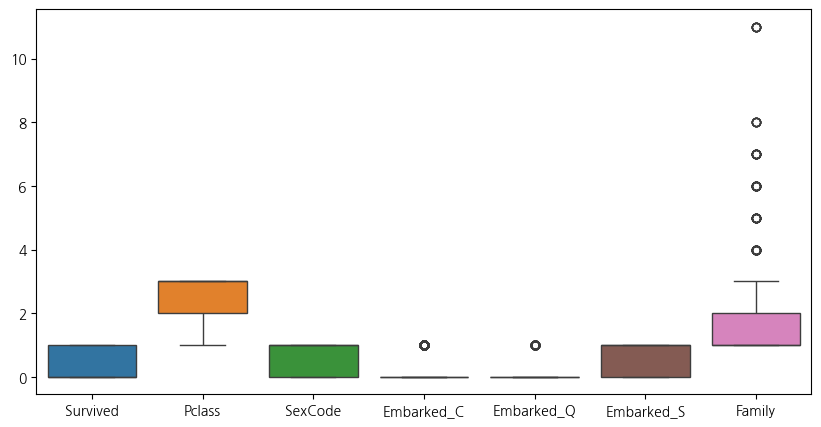

In [109]:
plt.figure(figsize = (10,5))

sns.boxplot(
      data= train_ml, 
            )

In [110]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000
